In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers = 2, tol=1e-6, eps=0.05, embedtxt=True)

In [3]:
pf.session.load_data(name='asia', src=FILE, fpath='../table/asia/asia.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[0.02193617820739746] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'empty', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "xray": "categorical",
    "bronc": "categorical",
    "asia": "categorical",
    "dysp": "categorical",
    "lung": "categorical",
    "either": "categorical",
    "smoke": "categorical",
    "tub": "categorical"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:inferred operators of attributes: {'xray': ['equal'], 'bronc': ['equal'], 'asia': ['equal'], 'dysp': ['equal'], 'lung': ['equal'], 'either': ['equal'], 'smoke': ['equal'], 'tub': ['equal']}
INFO:profiler.data.dataset:(possible operators: equal, notequal, greater_than, less_than)
INFO:profiler.utility:[0.08038592338562012] Load 

In [4]:
pf.session.load_training_data(multiplier = None)

INFO:profiler.utility:[0.08836984634399414] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 4 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 4, and the bound is 0.00142522
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 8/8 [00:00<00:00, 209.36it/s]
INFO:profiler.data.transformer:Number of training samples: 8000
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.24546265602111816] Create Training Data execution time: 0.15709280967712402



In [5]:
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[0.25276803970336914] Learn Structure start

INFO:profiler.learner:use threshold 0.5159
INFO:profiler.utility:[0.363478422164917] Learn Structure execution time: 0.11071038246154785



In [6]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[0.3719358444213867] Get Dependencies start

INFO:profiler.utility:[0.43370532989501953] Get Dependencies execution time: 0.06176948547363281



either -> dysp (0.24953555592058577)
either -> lung (0.019364591676364305)
either -> tub (0.05456426893482323)
either -> asia (0.028901639389307485)
either -> xray (0.08976936998398748)
dysp -> bronc (0.18857720900116628)
{'smoke': array([], dtype=object), 'either': array([], dtype=object), 'dysp': array(['either'], dtype=object), 'lung': array(['either'], dtype=object), 'tub': array(['either'], dtype=object), 'asia': array(['either'], dtype=object), 'xray': array(['either'], dtype=object), 'bronc': array(['dysp'], dtype=object)}


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


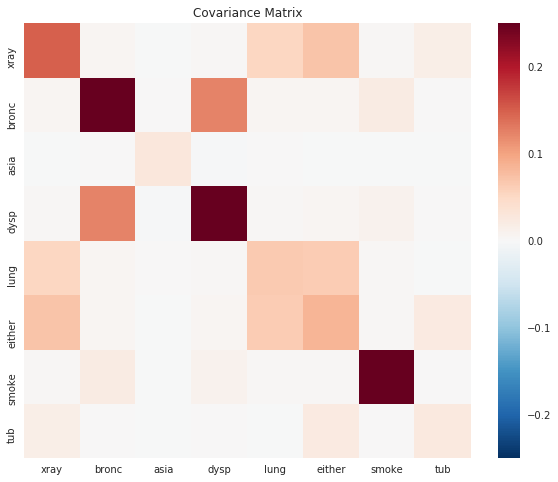

In [7]:
pf.session.visualize_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


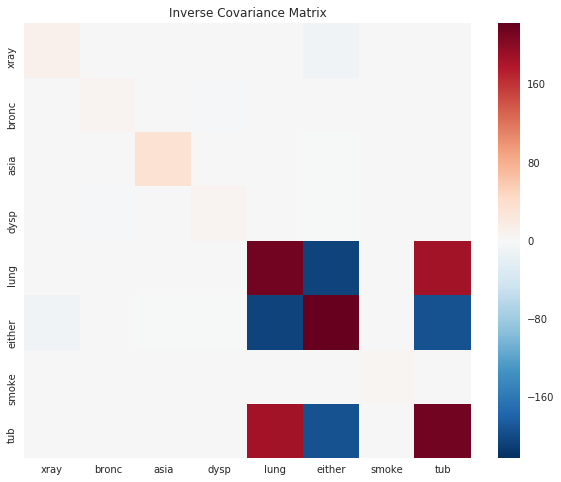

threshold =  16
sum =  [ 10.71627846   2.62618838   1.88125853   4.82927277 393.90613076
 412.12837419   0.         383.44506829]
attr =  Index(['xray', 'bronc', 'asia', 'dysp', 'lung', 'either', 'smoke', 'tub'], dtype='object')
Attr w/o dependency: 
 Index([['xray'], ['bronc'], ['asia'], ['dysp'], ['smoke']], dtype='object')


Attr w/ dependency: 
 Index([['lung'], ['either'], ['tub']], dtype='object')


In [8]:
pf.session.visualize_inverse_covariance()

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


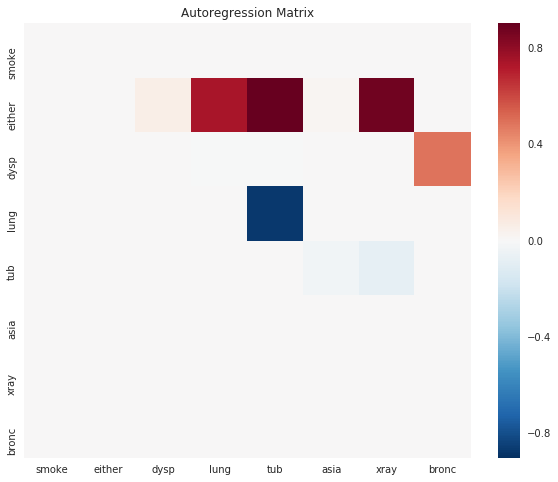

In [9]:
pf.session.visualize_autoregression()

In [10]:
pf.session.timer.get_stat()
pf.session.timer.to_csv()